In [1]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 5_000
step_range = [0,0]

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=5000, top_throttle=0, bottom_throttle=0, pitch_angle=None, roll_angle=None), TestStep(duration_ms=5000, top_throttle=0, bottom_throttle=0, pitch_angle=None, roll_angle=None)])

In [3]:
test_directory = Path("../test_data/load_cell_calibration_data_sp_redo/")

In [17]:
data_dict = {}

data_dict["test_load_cell_430g_0"] = test_run(
    filename=test_directory / "test_load_cell_430g_0.csv", plan=plan
)

data_dict["test_load_cell_430g_1"] = test_run(
    filename=test_directory / "test_load_cell_430g_1.csv", plan=plan
)

data_dict["test_load_cell_430g_2"] = test_run(
    filename=test_directory / "test_load_cell_430g_2.csv", plan=plan
)

data_dict["test_load_cell_430g_3"] = test_run(
    filename=test_directory / "test_load_cell_430g_3.csv", plan=plan
)

data_dict["test_load_cell_1kg_0"] = test_run(
    filename=test_directory / "test_load_cell_1kg_0.csv", plan=plan
)

data_dict["test_load_cell_1kg_1"] = test_run(
    filename=test_directory / "test_load_cell_1kg_1.csv", plan=plan
)

data_dict["test_load_cell_1kg_2"] = test_run(
    filename=test_directory / "test_load_cell_1kg_2.csv", plan=plan
)

data_dict["test_load_cell_1kg_3"] = test_run(
    filename=test_directory / "test_load_cell_1kg_3.csv", plan=plan
)

data_dict["test_load_cell_2.03kg_0"] = test_run(
    filename=test_directory / "test_load_cell_2.03kg_0.csv", plan=plan
)

data_dict["test_load_cell_2.03kg_1"] = test_run(
    filename=test_directory / "test_load_cell_2.03kg_1.csv", plan=plan
)

data_dict["test_load_cell_2.03kg_2"] = test_run(
    filename=test_directory / "test_load_cell_2.03kg_2.csv", plan=plan
)

data_dict["test_load_cell_2.03kg_3"] = test_run(
    filename=test_directory / "test_load_cell_2.03kg_3.csv", plan=plan
)

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 309,0,0,13.944000,10.240000,-0.000000,-0.097370,19.586353,0.000000

Rx: 4168,0,0,13.986000,10.240000,-0.014540,-0.083460,19.586353,0.000000

Rx: 8164,0,0,13.986000,10.240000,0.043620,-0.125190,19.586353,0.086455

Rx: 12164,0,0,13.986000,10.240000,0.04362

In [18]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])

In [19]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
    .sort_values(by=('thrust_N', 'mean'))
)

df_steps

top_motor_rpm      bottom_motor_rpm       \
                                          mean  std             mean  std   
test_name               throttle                                            
test_load_cell_430g_1   0                  0.0  0.0              0.0  0.0   
test_load_cell_430g_2   0                  0.0  0.0              0.0  0.0   
test_load_cell_430g_3   0                  0.0  0.0              0.0  0.0   
test_load_cell_430g_0   0                  0.0  0.0              0.0  0.0   
test_load_cell_1kg_0    0                  0.0  0.0              0.0  0.0   
test_load_cell_1kg_2    0                  0.0  0.0              0.0  0.0   
test_load_cell_1kg_1    0                  0.0  0.0              0.0  0.0   
test_load_cell_1kg_3    0                  0.0  0.0              0.0  0.0   
test_load_cell_2.03kg_2 0                  0.0  0.0              0.0  0.0   
test_load_cell_2.03kg_0 0                  0.0  0.0              0.0  0.0   
test_load_cell_2.03kg_3 0                  0.0  0.0              0.0  0.0   
test_load_cell_2.03kg_1 0                  0.0  0.0              0.0  0.0   

                                 batt_voltage_V           batt_current_A       \
                                           mean       std           mean  std   
test_name               throttle                                                
test_load_cell_430g_1   0             13.971418  0.022692          10.24  0.0   
test_load_cell_430g_2   0             13.971048  0.021600          10.24  0.0   
test_load_cell_430g_3   0             13.971989  0.021280          10.24  0.0   
test_load_cell_430g_0   0             13.969670  0.021859          10.24  0.0   
test_load_cell_1kg_0    0             13.973266  0.023010          10.24  0.0   
test_load_cell_1kg_2    0             13.973165  0.023061          10.24  0.0   
test_load_cell_1kg_1    0             13.970712  0.022238          10.24  0.0   
test_load_cell_1kg_3    0             13.969099  0.023572          10.24  0.0   
test_load_cell_2.03kg_2 0             13.970074  0.022377          10.24  0.0   
test_load_cell_2.03kg_0 0             13.966176  0.022605          10.24  0.0   
test_load_cell_2.03kg_3 0             13.972291  0.020825          10.24  0.0   
test_load_cell_2.03kg_1 0             13.968158  0.023356          10.24  0.0   

                                 top_current_A           bottom_current_A  \
                                          mean       std             mean   
test_name               throttle                                            
test_load_cell_430g_1   0             0.060952  0.054157        -0.099618   
test_load_cell_430g_2   0             0.060044  0.054716        -0.099351   
test_load_cell_430g_3   0             0.061138  0.051399        -0.104091   
test_load_cell_430g_0   0             0.061673  0.055442        -0.098594   
test_load_cell_1kg_0    0             0.063162  0.056998        -0.096079   
test_load_cell_1kg_2    0             0.066651  0.052002        -0.091895   
test_load_cell_1kg_1    0             0.069141  0.055249        -0.096435   
test_load_cell_1kg_3    0             0.065465  0.058411        -0.088468   
test_load_cell_2.03kg_2 0             0.063185  0.055858        -0.093653   
test_load_cell_2.03kg_0 0             0.064069  0.054797        -0.091806   
test_load_cell_2.03kg_3 0             0.061068  0.057463        -0.104559   
test_load_cell_2.03kg_1 0             0.063278  0.050477        -0.094588   

                                             thrust_N            torque_N  \
                                       std       mean       std      mean   
test_name               throttle                                            
test_load_cell_430g_1   0         0.056598   3.102021  0.010680  0.190244   
test_load_cell_430g_2   0         0.056322   4.023260  0.004771  0.473934   
test_load_cell_430g_3   0         0.053735   4.043693  0.003439  0.273732   
test_load_cell_430g_0   0         0.055260 

In [20]:
# hx711_scale_factor = 21400
# load_cell_offset_N = df_steps.loc['test_load_cell_offset_recal']['thrust_N']['mean'][0]
# load_cell_offset_bin = int(load_cell_offset_N * hx711_scale_factor)

# Remove offset test from df and subtract offset from existing measurements
# df_steps_nonzero = df_steps.drop('test_load_cell_offset_recal')
thrust_calibration_series = df_steps['thrust_N']['mean'] / 9.81
thrust_calibration_series

test_name                throttle
test_load_cell_430g_1    0           0.316210
test_load_cell_430g_2    0           0.410118
test_load_cell_430g_3    0           0.412201
test_load_cell_430g_0    0           0.454807
test_load_cell_1kg_0     0           0.903560
test_load_cell_1kg_2     0           0.969849
test_load_cell_1kg_1     0           1.007088
test_load_cell_1kg_3     0           1.031523
test_load_cell_2.03kg_2  0           1.953551
test_load_cell_2.03kg_0  0           1.979992
test_load_cell_2.03kg_3  0           1.993767
test_load_cell_2.03kg_1  0           2.017601
Name: mean, dtype: float64

In [21]:
mass_true_kg = np.array([0.43, 0.43, 0.43, 0.43, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0])

In [22]:
def calibrated_thrust(measured_thrust, gain, offset):
    return gain * measured_thrust + offset

In [23]:
from scipy.optimize import curve_fit

In [24]:
thrust_fit_popt,thrust_fit_pcov = curve_fit(calibrated_thrust, thrust_calibration_series, mass_true_kg, sigma=df_steps['thrust_N']['std'] / 9.81, absolute_sigma=True)
thrust_cal_fcn = np.vectorize(lambda T: calibrated_thrust(T, thrust_fit_popt[0], thrust_fit_popt[1]))
thrust_line_pts = [0, 2.03]

print(thrust_fit_popt)

[ 1.01202859 -0.00406699]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


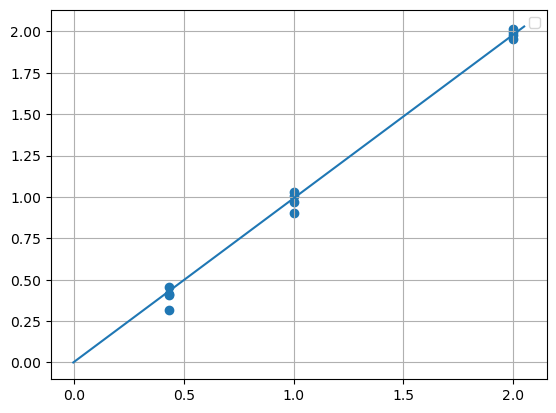

In [25]:
plt.scatter(mass_true_kg, thrust_calibration_series)
plt.plot(thrust_cal_fcn(thrust_line_pts), thrust_line_pts)
plt.legend()
plt.grid()